# Data Wrangling

In [16]:
# pandas for df structures and operations for manipulating numerical tables and time series
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix


# matplotlib.pyplot for df plots
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from scipy.stats import zscore



# from utilities import visualize_classifier
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

## Data Preparation

In [17]:
directory = "../Data/"
# Read the dataset
dataset_file_name = "Walmart_Sales.csv"
df = pd.read_csv(directory + "/" + dataset_file_name)

In [18]:
# Check the shape of the data
df.shape

(6435, 8)

In [19]:
# See which are the attribute labels
list(df)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [20]:
# Get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [22]:
# View the data
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [23]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [24]:
df = df.dropna()

In [25]:
# Find columns with only one unique value
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

print("Columns with a single unique value (will be removed):")
print(constant_cols)

# Drop these columns from the DataFrame
df = df.drop(columns=constant_cols)

Columns with a single unique value (will be removed):
[]


In [26]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Rows before outlier removal: 6435
Rows after outlier removal:  5923
Total rows removed:          512

Rows removed per column:
  CPI: 0
  Fuel_Price: 0
  Store: 0
  Temperature: 3
  Unemployment: 481
  Weekly_Sales: 28


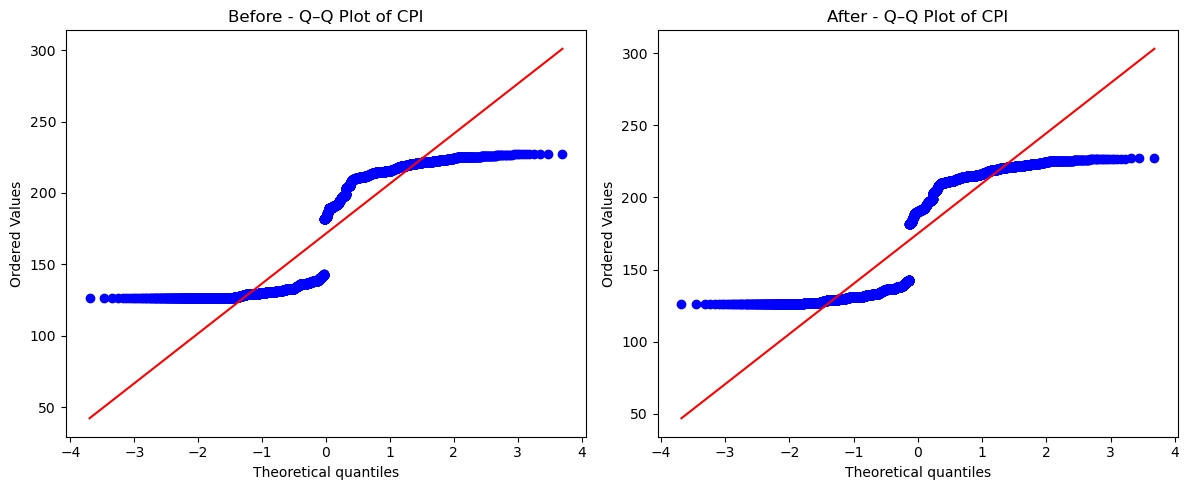

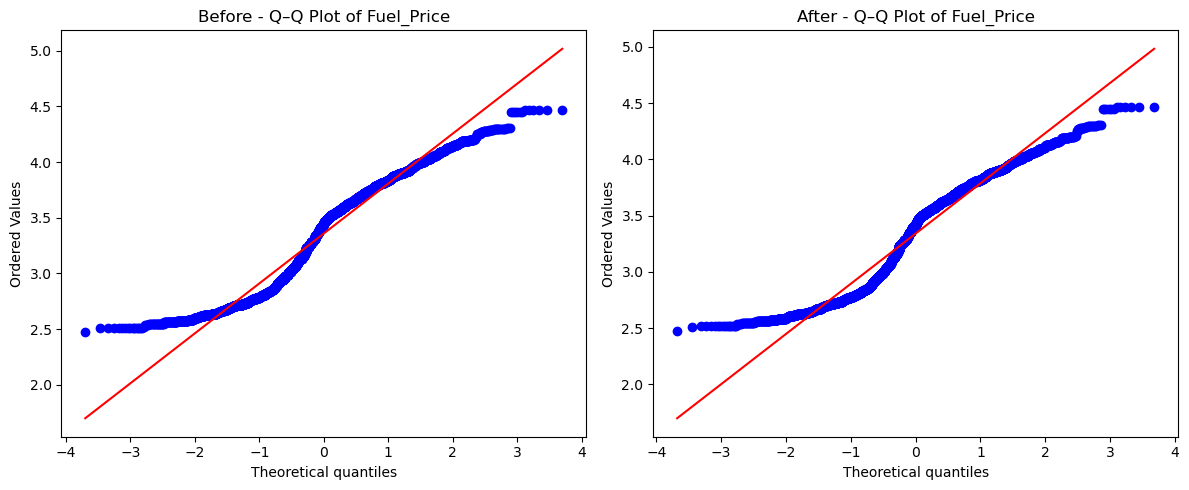

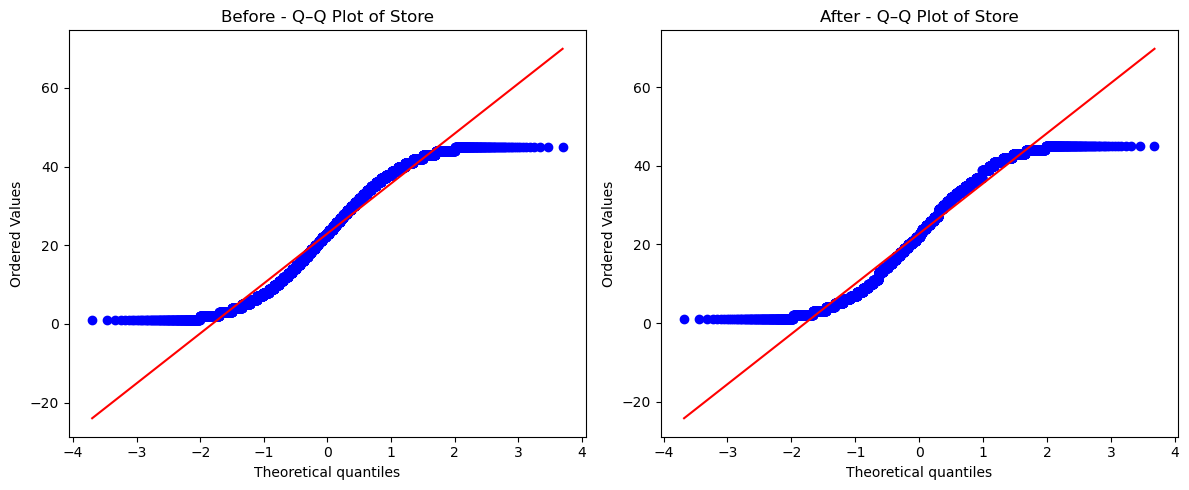

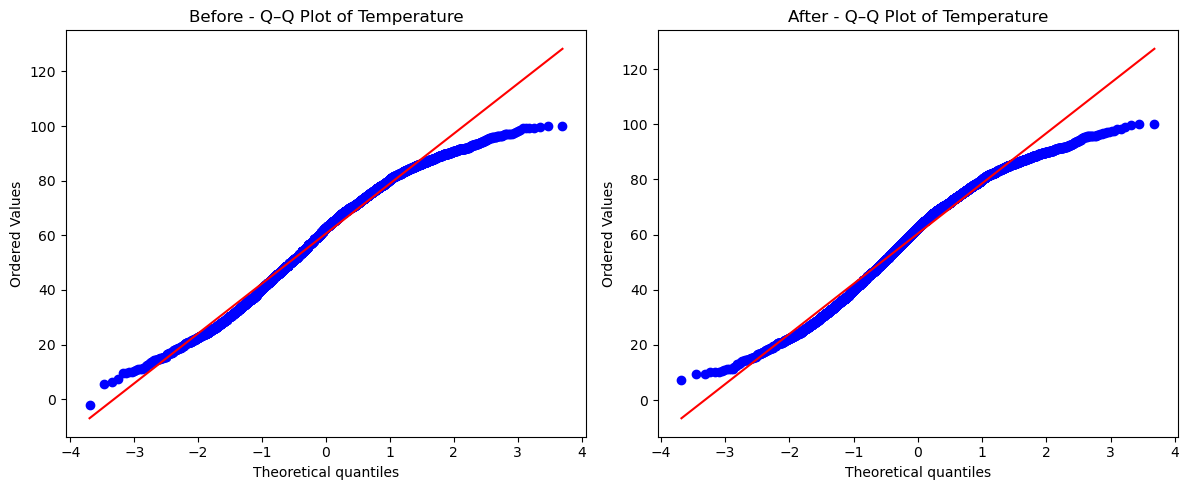

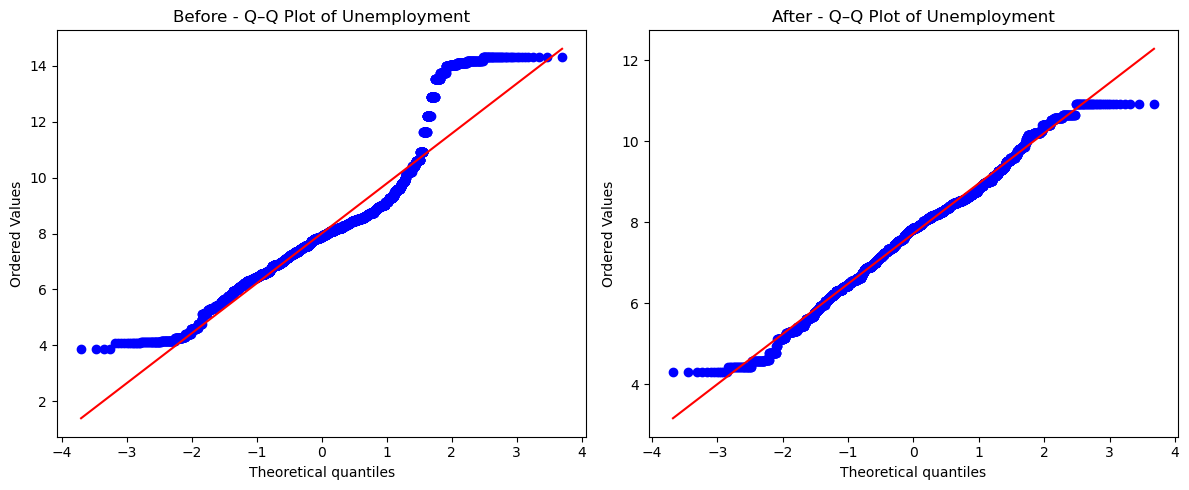

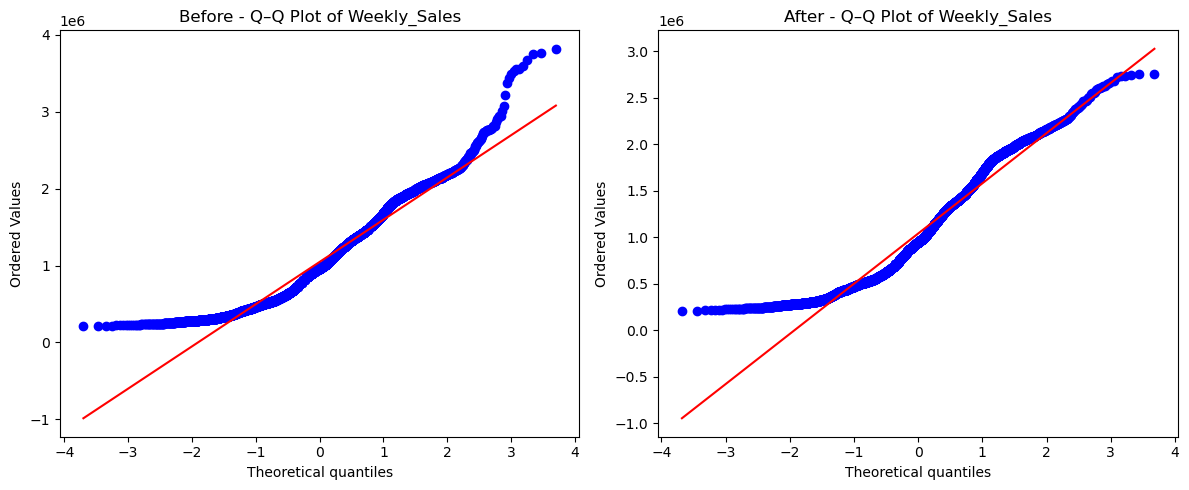

In [27]:
# Columns to apply outlier removal on (skewed numeric columns)
skewed_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewed_cols = skewed_cols.difference(["Holiday_Flag"])

# Keep a copy of original df for plotting before/after
df_before = df.copy()

rows_before = len(df)
print(f"Rows before outlier removal: {rows_before}")

removed_per_column = {}

for col in skewed_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Identify outliers in current df
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    removed_per_column[col] = len(outliers)
    
    # Filter out outliers for this column
    df = df[(df[col] >= lower) & (df[col] <= upper)]

rows_after = len(df)
total_removed = rows_before - rows_after

print(f"Rows after outlier removal:  {rows_after}")
print(f"Total rows removed:          {total_removed}")
print("\nRows removed per column:")
for col, count in removed_per_column.items():
    print(f"  {col}: {count}")

# Q–Q plots to visually confirm improvement for each column
for col in skewed_cols:
    plt.figure(figsize=(12, 5))

    # Before outlier removal
    plt.subplot(1, 2, 1)
    stats.probplot(df_before[col], dist="norm", plot=plt)
    plt.title(f"Before - Q–Q Plot of {col}")

    # After outlier removal
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"After - Q–Q Plot of {col}")

    plt.tight_layout()
    plt.show()

In [28]:
df.shape

(5923, 8)

In [29]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5923.000000,5.923000e+03,5923.000000,5923.000000,5923.000000,5923.000000,5923.000000
mean,22.793854,1.041038e+06,0.069053,60.409046,3.340349,175.005846,7.721439
std,13.092308,5.543193e+05,0.253565,18.397096,0.458072,39.024239,1.243295
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.527446e+05,0.000000,46.945000,2.889000,132.763355,6.891000
50%,22.000000,9.478151e+05,0.000000,62.590000,3.417000,190.006988,7.852000
75%,34.000000,1.428915e+06,0.000000,74.715000,3.720500,213.791715,8.494000
max,45.000000,2.760347e+06,1.000000,100.140000,4.468000,227.232807,10.926000


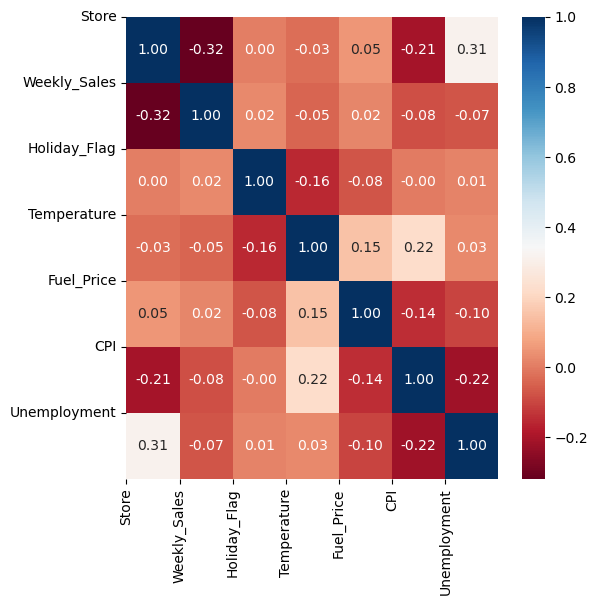

In [30]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr(method='pearson')

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [31]:
df.to_csv(directory + "/Cleaned-" + dataset_file_name, index=False)